In [1]:
import pandas as pd
k_df=pd.read_json("cleaned_data.json")

In [2]:
import pandas as pd

# Convert the timestamp to datetime format
k_df['timestamp'] = pd.to_datetime(k_df.index)

# Now we will group by date and locationName, and sum the values.
k_df['date'] = k_df['timestamp'].dt.date  # Extract date from timestamp

daily_consumption = k_df.groupby(['date', 'locationName'], as_index=False)['value'].sum()

# Display the result
print(daily_consumption)


            date                 locationName  value
0     2020-01-01  1000 Hakaniemen kauppahalli   1.49
1     2020-01-02  1000 Hakaniemen kauppahalli   7.47
2     2020-01-03  1000 Hakaniemen kauppahalli   6.05
3     2020-01-04  1000 Hakaniemen kauppahalli   6.53
4     2020-01-05  1000 Hakaniemen kauppahalli  54.61
...          ...                          ...    ...
1761  2024-10-27  1000 Hakaniemen kauppahalli   0.71
1762  2024-10-28  1000 Hakaniemen kauppahalli  22.59
1763  2024-10-29  1000 Hakaniemen kauppahalli  22.46
1764  2024-10-30  1000 Hakaniemen kauppahalli  21.69
1765  2024-10-31  1000 Hakaniemen kauppahalli   0.02

[1766 rows x 3 columns]


In [3]:
daily_consumption['unique_id']=1

In [4]:
start_date = pd.to_datetime('2020-01-01').date()  # Convert to datetime.date
end_date = pd.to_datetime('2024-08-31').date()  

In [5]:
df=daily_consumption[(daily_consumption['date'] >= start_date) & (daily_consumption['date'] <= end_date)]
rest_df=daily_consumption[(daily_consumption['date']) > end_date].iloc[:60]

In [6]:
rest_df.shape

(60, 4)

In [7]:
Y_df = pd.DataFrame({
    'ds': df['date'],  # Timestamps as 'ds'
    'y': df['value'],  # The actual data as 'y'
    'unique_id':df['unique_id']  # The unique identifier

})
check_df= pd.DataFrame({
    'ds': rest_df['date'],  # Timestamps as 'ds'
    'actual': rest_df['value'],  # The actual data as 'y'
    'unique_id':rest_df['unique_id'] } )

In [8]:
Y_df['ds'] = pd.to_datetime(Y_df['ds'])

In [9]:
from neuralforecast import NeuralForecast
from neuralforecast.auto import AutoNHITS, AutoLSTM


In [10]:
nf = NeuralForecast(
    models=[
        AutoNHITS(h=2*30, num_samples=5),
        AutoLSTM(h=2*30, num_samples=5),
    ],
    freq='D'
)
nf.fit(df=Y_df)

(_train_tune pid=42188) C:\Users\35841\Desktop\energy_consumption_modeling\energyEV\Lib\site-packages\ray\tune\integration\pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=42188) Seed set to 5
(_train_tune pid=42188) GPU available: False, used: False
(_train_tune pid=42188) TPU available: False, using: 0 TPU cores
(_train_tune pid=42188) HPU available: False, using: 0 HPUs
(_train_tune pid=42188) 
(_train_tune pid=42188)   | Name            | Type          | Params | Mode 
(_train_tune pid=42188) ----------------------------------------------------------
(_train_tune pid=42188) 0 | loss            | MAE           | 0      | train
(_train_tune pid=42188) 1 | padder          | ConstantPad1d | 0      | train
(_train_tune pid=42188) 2 | scaler          | TemporalNorm  | 0      | train
(_train_tune pid=42188) 3 | hist_encoder    | LSTM      

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 14.40it/s, v_num=0, train_loss_step=1.110, train_loss_epoch=0.957]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=42188) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 18.96it/s, v_num=0, train_loss_step=1.280, train_loss_epoch=0.917, valid_loss=10.20]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=42188) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 18.33it/s, v_num=0, train_loss_step=1.190, train_loss_epoch=1.180, valid_loss=10.10]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=42188) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 17.75it/s, v_num=0, train_loss_step=1.200, train_loss_epoch=0.900, valid_loss=8.920]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [

(_train_tune pid=42188) `Trainer.fit` stopped: `max_steps=1000` reached.


(_train_tune pid=42188) 
Epoch 999: 100%|██████████| 1/1 [00:00<00:00,  4.68it/s, v_num=0, train_loss_step=0.746, train_loss_epoch=0.746, valid_loss=7.800]


(_train_tune pid=3332) C:\Users\35841\Desktop\energy_consumption_modeling\energyEV\Lib\site-packages\ray\tune\integration\pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=3332) Seed set to 2
(_train_tune pid=3332) GPU available: False, used: False
(_train_tune pid=3332) TPU available: False, using: 0 TPU cores
(_train_tune pid=3332) HPU available: False, using: 0 HPUs
(_train_tune pid=3332) 
(_train_tune pid=3332)   | Name            | Type          | Params | Mode 
(_train_tune pid=3332) ----------------------------------------------------------
(_train_tune pid=3332) 0 | loss            | MAE           | 0      | train
(_train_tune pid=3332) 1 | padder          | ConstantPad1d | 0      | train
(_train_tune pid=3332) 2 | scaler          | TemporalNorm  | 0      | train
(_train_tune pid=3332) 3 | hist_encoder    | LSTM          | 1.1 M 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]
Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  1.46it/s, v_num=0, train_loss_step=0.881, train_loss_epoch=0.911]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=3332) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  1.61it/s, v_num=0, train_loss_step=0.888, train_loss_epoch=0.892, valid_loss=8.180]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=3332) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00,  1.85it/s, v_num=0, train_loss_step=0.721, train_loss_epoch=0.738, valid_loss=8.790]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=3332) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00,  1.62it/s, v_num=0, train_loss_step=0.577, train_loss_epoch=0.580, valid_loss=7.990]
Validation: |          | 0/? [00:00<?, ?it/s]

(_train_tune pid=3332) `Trainer.fit` stopped: `max_steps=1000` reached.


(_train_tune pid=3332) 
Epoch 999: 100%|██████████| 1/1 [00:00<00:00,  1.16it/s, v_num=0, train_loss_step=0.221, train_loss_epoch=0.221, valid_loss=8.090]


(_train_tune pid=28888) C:\Users\35841\Desktop\energy_consumption_modeling\energyEV\Lib\site-packages\ray\tune\integration\pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=28888) Seed set to 3
(_train_tune pid=28888) GPU available: False, used: False
(_train_tune pid=28888) TPU available: False, using: 0 TPU cores
(_train_tune pid=28888) HPU available: False, using: 0 HPUs
(_train_tune pid=28888) 
(_train_tune pid=28888)   | Name            | Type          | Params | Mode 
(_train_tune pid=28888) ----------------------------------------------------------
(_train_tune pid=28888) 0 | loss            | MAE           | 0      | train
(_train_tune pid=28888) 1 | padder          | ConstantPad1d | 0      | train
(_train_tune pid=28888) 2 | scaler          | TemporalNorm  | 0      | train
(_train_tune pid=28888) 3 | hist_encoder    | LSTM      

Epoch 99: 100%|██████████| 1/1 [00:00<00:00,  9.11it/s, v_num=0, train_loss_step=0.889, train_loss_epoch=0.851]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=28888) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  8.76it/s, v_num=0, train_loss_step=0.922, train_loss_epoch=0.969, valid_loss=10.70]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=28888) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 10.62it/s, v_num=0, train_loss_step=0.800, train_loss_epoch=0.788, valid_loss=14.10]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=28888) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 10.54it/s, v_num=0, train_loss_step=0.851, train_loss_epoch=0.948, valid_loss=12.00]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [

(_train_tune pid=28888) `Trainer.fit` stopped: `max_steps=500` reached.


(_train_tune pid=28888) 
Epoch 499: 100%|██████████| 1/1 [00:00<00:00,  2.83it/s, v_num=0, train_loss_step=0.773, train_loss_epoch=0.773, valid_loss=9.290]


(_train_tune pid=7520) C:\Users\35841\Desktop\energy_consumption_modeling\energyEV\Lib\site-packages\ray\tune\integration\pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=7520) Seed set to 10
(_train_tune pid=7520) GPU available: False, used: False
(_train_tune pid=7520) TPU available: False, using: 0 TPU cores
(_train_tune pid=7520) HPU available: False, using: 0 HPUs
(_train_tune pid=7520) 
(_train_tune pid=7520)   | Name            | Type          | Params | Mode 
(_train_tune pid=7520) ----------------------------------------------------------
(_train_tune pid=7520) 0 | loss            | MAE           | 0      | train
(_train_tune pid=7520) 1 | padder          | ConstantPad1d | 0      | train
(_train_tune pid=7520) 2 | scaler          | TemporalNorm  | 0      | train
(_train_tune pid=7520) 3 | hist_encoder    | LSTM          | 31.0 

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 36.32it/s, v_num=0, train_loss_step=0.971, train_loss_epoch=0.688]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 30.94it/s]
(_train_tune pid=7520) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00, 64.00it/s, v_num=0, train_loss_step=1.110, train_loss_epoch=0.777, valid_loss=12.40] 
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=7520) 
Validation DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 21.13it/s]
                                                                      
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 47.30it/s, v_num=0, train_loss_step=1.100, train_loss_epoch=1.290, valid_loss=10.80]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=7520) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 31.99it/s, v_num=0, train_loss

(_train_tune pid=7520) `Trainer.fit` stopped: `max_steps=1000` reached.
(_train_tune pid=36116) C:\Users\35841\Desktop\energy_consumption_modeling\energyEV\Lib\site-packages\ray\tune\integration\pytorch_lightning.py:198: `ray.tune.integration.pytorch_lightning.TuneReportCallback` is deprecated. Use `ray.tune.integration.pytorch_lightning.TuneReportCheckpointCallback` instead.
(_train_tune pid=36116) Seed set to 15
(_train_tune pid=36116) GPU available: False, used: False
(_train_tune pid=36116) TPU available: False, using: 0 TPU cores
(_train_tune pid=36116) HPU available: False, using: 0 HPUs
(_train_tune pid=36116) 
(_train_tune pid=36116)   | Name            | Type          | Params | Mode 
(_train_tune pid=36116) ----------------------------------------------------------
(_train_tune pid=36116) 0 | loss            | MAE           | 0      | train
(_train_tune pid=36116) 1 | padder          | ConstantPad1d | 0      | train
(_train_tune pid=36116) 2 | scaler          | TemporalNorm  

Epoch 99: 100%|██████████| 1/1 [00:00<00:00, 10.91it/s, v_num=0, train_loss_step=0.924, train_loss_epoch=0.925]
Validation: |          | 0/? [00:00<?, ?it/s]
(_train_tune pid=36116) 
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=36116) 
Epoch 199: 100%|██████████| 1/1 [00:00<00:00,  9.14it/s, v_num=0, train_loss_step=0.939, train_loss_epoch=0.942, valid_loss=9.420]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=36116) 
Epoch 299: 100%|██████████| 1/1 [00:00<00:00, 11.29it/s, v_num=0, train_loss_step=0.908, train_loss_epoch=0.910, valid_loss=12.30]
Validation: |          | 0/? [00:00<?, ?it/s]
Validation DataLoader 0:   0%|          | 0/1 [00:00<?, ?it/s]
(_train_tune pid=36116) 
Epoch 399: 100%|██████████| 1/1 [00:00<00:00, 12.73it/s, v_num=0, train_loss_step=0.865, train_loss_epoch=0.866, valid_loss=7.390]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499:   0%|      

(_train_tune pid=36116) `Trainer.fit` stopped: `max_steps=500` reached.
2024-12-05 18:38:25,070	INFO tune.py:1009 -- Wrote the latest version of all result files and experiment state to 'C:/Users/35841/ray_results/_train_tune_2024-12-05_18-24-01' in 0.0203s.
Seed set to 10
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MAE           | 0      | eval 
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | LSTM          | 31.0 K | train
4 | context_adapter | Linear        | 153 K  | train
5 | mlp_decoder     | MLP           | 3.3 K  | train
----------------------------------------------------------
187 K     Trainable params
0         Non-trainable params
187 K     Total params
0.749     Total estimated model params size 

Epoch 499: 100%|██████████| 1/1 [00:00<00:00, 10.62it/s, v_num=0, train_loss_step=0.737, train_loss_epoch=0.737, valid_loss=8.700]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 499: 100%|██████████| 1/1 [00:00<00:00,  6.13it/s, v_num=0, train_loss_step=0.737, train_loss_epoch=0.737, valid_loss=9.350]


Sanity Checking: |                                                                               | 0/? [00:00<…

Training: |                                                                                      | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

Validation: |                                                                                    | 0/? [00:00<…

`Trainer.fit` stopped: `max_steps=1000` reached.


In [18]:
fcst_df = nf.predict()

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting: |                                                                                    | 0/? [00:00<…

C:\Users\35841\Desktop\energy_consumption_modeling\energyEV\Lib\site-packages\neuralforecast\core.py:214: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoNHITS,AutoLSTM
unique_id,,,
1,2024-09-01,44.723534,12.581085
1,2024-09-02,48.808212,25.406292
1,2024-09-03,39.117203,39.343071
1,2024-09-04,29.631641,40.147255
1,2024-09-05,23.188076,39.718605
1,2024-09-06,28.528814,42.766407
1,2024-09-07,26.518375,37.581017
1,2024-09-08,25.463428,13.328389
1,2024-09-09,27.549442,23.829197


In [13]:
for model in nf.models:
    print(model)

AutoNHITS
AutoLSTM


In [17]:
Y_df

,ds,y,unique_id
0,2020-01-01,1.49,1
1,2020-01-02,7.47,1
2,2020-01-03,6.05,1
3,2020-01-04,6.53,1
4,2020-01-05,54.61,1
...,...,...,...
1700,2024-08-27,27.76,1
1701,2024-08-28,28.32,1
1702,2024-08-29,32.08,1
1703,2024-08-30,32.67,1


In [20]:
# Reset index of fcst_df to ensure 'unique_id' is a column
fcst_df = fcst_df.reset_index()

# Print the first few rows of fcst_df to check
print(fcst_df.head())


   unique_id         ds  AutoNHITS   AutoLSTM
0          1 2024-09-01  44.723534  12.581085
1          1 2024-09-02  48.808212  25.406292
2          1 2024-09-03  39.117203  39.343071
3          1 2024-09-04  29.631641  40.147255
4          1 2024-09-05  23.188076  39.718605


In [26]:
check_df = check_df.rename(columns={'actual': 'y'})

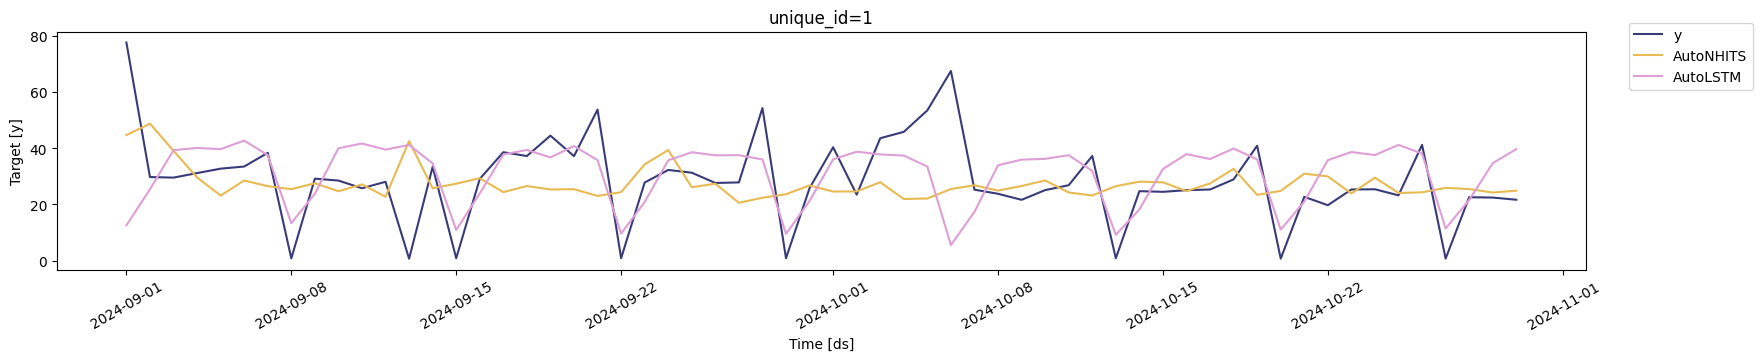

In [27]:
from statsforecast import StatsForecast
StatsForecast.plot(check_df, fcst_df, engine='matplotlib', max_insample_length=30 * 2)


In [33]:
nf.models[0]

AutoNHITS

In [34]:
nf.save(path='./autonhits_model/',
        model_index=[0], 
        overwrite=True,
        save_dataset=True)


In [ ]:
#nf2 = NeuralForecast.load(path='./autonhits_model/')
#Y_hat_df = nf2.predict().reset_index()
#Y_hat_df.head()

